In [73]:
#Import required libraries :
import pandas as pd
import nltk
from nltk import sent_tokenize
from nltk import word_tokenize
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [74]:
#get the Data used :
df = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv')

In [75]:
df

id  label                                              tweet
0          1      0   @user when a father is dysfunctional and is s...
1          2      0  @user @user thanks for #lyft credit i can't us...
2          3      0                                bihday your majesty
3          4      0  #model   i love u take with u all the time in ...
4          5      0             factsguide: society now    #motivation
...      ...    ...                                                ...
31957  31958      0  ate @user isz that youuu?ðððððð...
31958  31959      0    to see nina turner on the airwaves trying to...
31959  31960      0  listening to sad songs on a monday morning otw...
31960  31961      1  @user #sikh #temple vandalised in in #calgary,...
31961  31962      0                   thank you @user for you follow  

[31962 rows x 3 columns]

In [76]:
# Read the tweet text only  :
tweet = pd.Series(df.tweet).to_string()
#tweet.head()

#Length of the tweet :
print (len(tweet))
print("\n")

#print data type
print(type(tweet))

1885757


<class 'str'>


In [77]:
import re

#Remove punctuations, numbers and @user and save it in a new column [clean_data]
tweet = df['clean_data'] = df['tweet'].apply(lambda x: re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)','', x))

df.head(10)

id  ...                                         clean_data
0   1  ...    when a father is dysfunctional and is so sel...
1   2  ...    thanks for lyft credit i cant use cause they...
2   3  ...                                bihday your majesty
3   4  ...  model   i love u take with u all the time in u...
4   5  ...               factsguide society now    motivation
5   6  ...  22 huge fan fare and big talking before they l...
6   7  ...                      camping tomorrow        danny
7   8  ...  the next school year is the year for exams can...
8   9  ...  we won love the land allin cavs champions clev...
9  10  ...                   welcome here   im   its so gr8  

[10 rows x 4 columns]

In [78]:
#Import required libraries :
from nltk.probability import FreqDist

text_split = df.clean_data.to_string().split()
print(text_split)

#Find the frequency :
fdist = FreqDist(text_split)

#Print 10 most common words :
fdist.most_common(10)

['0', 'when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 'so', 'sel...', '1', 'thanks', 'for', 'lyft', 'credit', 'i', 'cant', 'use', 'cause', 'they...', '2', 'bihday', 'your', 'majesty', '3', 'model', 'i', 'love', 'u', 'take', 'with', 'u', 'all', 'the', 'time', 'in', 'u...', '4', 'factsguide', 'society', 'now', 'motivation', '5', '22', 'huge', 'fan', 'fare', 'and', 'big', 'talking', 'before', 'they', 'l...', '6', 'camping', 'tomorrow', 'danny', '7', 'the', 'next', 'school', 'year', 'is', 'the', 'year', 'for', 'exams', 'can...', '8', 'we', 'won', 'love', 'the', 'land', 'allin', 'cavs', 'champions', 'clev...', '9', 'welcome', 'here', 'im', 'its', 'so', 'gr8', '10', 'ireland', 'consumer', 'price', 'index', 'mom', 'climbed', 'fro...', '11', 'we', 'are', 'so', 'selfish', 'orlando', 'standwithorlando', 'pul...', '12', 'i', 'get', 'to', 'see', 'my', 'daddy', 'today', '80days', 'gettingfed', '13', 'cnn', 'calls', 'michigan', 'middle', 'school', 'build', 'the', 'wa...', '14', 'no', 'com

[('the', 6329),
 ('to', 5950),
 ('...', 4713),
 ('i', 4646),
 ('a', 4356),
 ('you', 3423),
 ('for', 3102),
 ('is', 2848),
 ('my', 2833),
 ('in', 2771)]

In [79]:
import nltk
from nltk.corpus import stopwords
#print(stopwords.words('english'))

#df['clean_data'].apply(lambda x: [item for item in x if item not in stop])


token_text = pd.Series(df.clean_data).to_string()

words_token = word_tokenize(token_text)

print(len(words_token))
df.clean_data.head(10)

304142


0      when a father is dysfunctional and is so sel...
1      thanks for lyft credit i cant use cause they...
2                                  bihday your majesty
3    model   i love u take with u all the time in u...
4                 factsguide society now    motivation
5    22 huge fan fare and big talking before they l...
6                        camping tomorrow        danny
7    the next school year is the year for exams can...
8    we won love the land allin cavs champions clev...
9                     welcome here   im   its so gr8  
Name: clean_data, dtype: object

In [80]:

#Tokenize the text by sentences :
sentences = sent_tokenize(token_text)

#How many sentences are there? :
print (len(sentences)) 

#Print the sentences :
print(sentences)
#sentences

1
['0          when a father is dysfunctional and is so sel...\n1          thanks for lyft credit i cant use cause they...\n2                                      bihday your majesty\n3        model   i love u take with u all the time in u...\n4                     factsguide society now    motivation\n5        22 huge fan fare and big talking before they l...\n6                            camping tomorrow        danny\n7        the next school year is the year for exams can...\n8        we won love the land allin cavs champions clev...\n9                         welcome here   im   its so gr8  \n10         ireland consumer price index mom climbed fro...\n11       we are so selfish orlando standwithorlando pul...\n12         i get to see my daddy today   80days gettingfed\n13        cnn calls michigan middle school build the wa...\n14       no comment  in australia   opkillingbay seashe...\n15           ouchjunior is angrygot7 junior yugyoem   omg \n16       i am thankful for having a 

In [81]:
#Tokenize the text with words:
words = word_tokenize(token_text)

#How many words are there?:
print (len(words))
print("\n")

#Print words: 
#since this will print a huge number of words, colab gave an IOPub error.
#print (words)

304142




In [82]:
#Import required libraries :
from nltk.probability import FreqDist

#Find the frequency :
fdist = FreqDist(words)

#Print 20 most common words :
fdist.most_common(20)

[('...', 25118),
 ('the', 6467),
 ('to', 6131),
 ('i', 4867),
 ('a', 4707),
 ('you', 3517),
 ('for', 3151),
 ('is', 2885),
 ('my', 2871),
 ('in', 2864),
 ('and', 2664),
 ('of', 2523),
 ('this', 1904),
 ('be', 1706),
 ('day', 1693),
 ('with', 1674),
 ('on', 1669),
 ('love', 1657),
 ('so', 1462),
 ('all', 1454)]

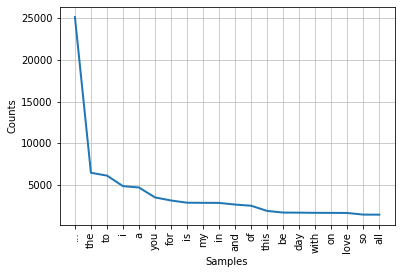

In [83]:
#Plot the graph for fdist :
import matplotlib.pyplot as plt

fdist.plot(20)

In [84]:
#Empty list to store words:
words_no_punc = []

#Removing punctuation marks :
for w in words:
    if w.isalpha():
        words_no_punc.append(w.lower())

#Print the words without punctution marks :
print (words_no_punc)

print ("\n")

#Length :
print (len(words_no_punc))

['when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 'so', 'sel', 'thanks', 'for', 'lyft', 'credit', 'i', 'cant', 'use', 'cause', 'they', 'bihday', 'your', 'majesty', 'model', 'i', 'love', 'u', 'take', 'with', 'u', 'all', 'the', 'time', 'in', 'u', 'factsguide', 'society', 'now', 'motivation', 'huge', 'fan', 'fare', 'and', 'big', 'talking', 'before', 'they', 'l', 'camping', 'tomorrow', 'danny', 'the', 'next', 'school', 'year', 'is', 'the', 'year', 'for', 'exams', 'can', 'we', 'won', 'love', 'the', 'land', 'allin', 'cavs', 'champions', 'clev', 'welcome', 'here', 'im', 'its', 'so', 'ireland', 'consumer', 'price', 'index', 'mom', 'climbed', 'fro', 'we', 'are', 'so', 'selfish', 'orlando', 'standwithorlando', 'pul', 'i', 'get', 'to', 'see', 'my', 'daddy', 'today', 'gettingfed', 'cnn', 'calls', 'michigan', 'middle', 'school', 'build', 'the', 'wa', 'no', 'comment', 'in', 'australia', 'opkillingbay', 'seashe', 'ouchjunior', 'is', 'junior', 'yugyoem', 'omg', 'i', 'am', 'thankful', 'for', 

In [85]:
#Frequency distribution :
fdist = FreqDist(words_no_punc)
fdist.most_common(20)

[('the', 6467),
 ('to', 6131),
 ('i', 4867),
 ('a', 4707),
 ('you', 3517),
 ('for', 3151),
 ('is', 2885),
 ('my', 2871),
 ('in', 2864),
 ('and', 2664),
 ('of', 2523),
 ('this', 1904),
 ('be', 1706),
 ('day', 1693),
 ('with', 1674),
 ('on', 1669),
 ('love', 1657),
 ('so', 1462),
 ('all', 1454),
 ('happy', 1358)]

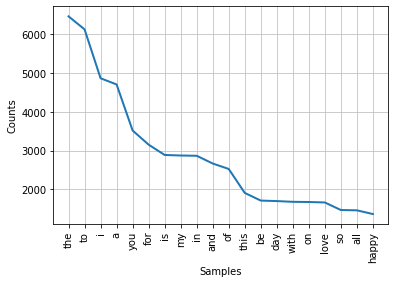

In [86]:
#Plot the most common words on grpah:
fdist.plot(20)

In [87]:
from nltk.corpus import stopwords

#List of stopwords
stopwords = stopwords.words("english")
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [88]:
#Empty list to store clean words :
import re

clean_words = []

for w in words_no_punc:
    if w not in stopwords:
        clean_words.append(w)
        
print(clean_words)
print("\n")
print(len(clean_words))

['father', 'dysfunctional', 'sel', 'thanks', 'lyft', 'credit', 'cant', 'use', 'cause', 'bihday', 'majesty', 'model', 'love', 'u', 'take', 'u', 'time', 'u', 'factsguide', 'society', 'motivation', 'huge', 'fan', 'fare', 'big', 'talking', 'l', 'camping', 'tomorrow', 'danny', 'next', 'school', 'year', 'year', 'exams', 'love', 'land', 'allin', 'cavs', 'champions', 'clev', 'welcome', 'im', 'ireland', 'consumer', 'price', 'index', 'mom', 'climbed', 'fro', 'selfish', 'orlando', 'standwithorlando', 'pul', 'get', 'see', 'daddy', 'today', 'gettingfed', 'cnn', 'calls', 'michigan', 'middle', 'school', 'build', 'wa', 'comment', 'australia', 'opkillingbay', 'seashe', 'ouchjunior', 'junior', 'yugyoem', 'omg', 'thankful', 'paner', 'thankful', 'posi', 'retweet', 'agree', 'friday', 'smiles', 'around', 'via', 'ig', 'user', 'coo', 'know', 'essential', 'oils', 'made', 'people', 'blaming', 'ha', 'conceded', 'goal', 'w', 'sad', 'little', 'dude', 'badday', 'coneofshame', 'cats', 'piss', 'product', 'day', 'happ

In [89]:
#Frequency distribution :
fdist = FreqDist(clean_words)

fdist.most_common(20)

[('day', 1693),
 ('love', 1657),
 ('happy', 1358),
 ('u', 1306),
 ('im', 877),
 ('time', 846),
 ('thankful', 840),
 ('amp', 801),
 ('new', 754),
 ('today', 728),
 ('positive', 677),
 ('bihday', 660),
 ('like', 658),
 ('good', 649),
 ('get', 606),
 ('cant', 595),
 ('life', 581),
 ('fathers', 579),
 ('people', 537),
 ('see', 527)]

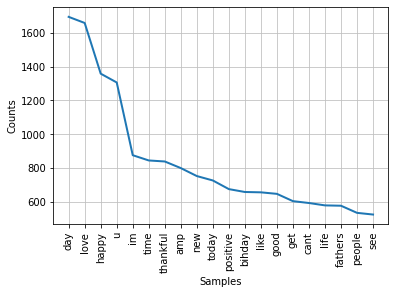

In [90]:
#Plot the most common words on grpah:
fdist.plot(20)

In [91]:
df.head(10)

id  ...                                         clean_data
0   1  ...    when a father is dysfunctional and is so sel...
1   2  ...    thanks for lyft credit i cant use cause they...
2   3  ...                                bihday your majesty
3   4  ...  model   i love u take with u all the time in u...
4   5  ...               factsguide society now    motivation
5   6  ...  22 huge fan fare and big talking before they l...
6   7  ...                      camping tomorrow        danny
7   8  ...  the next school year is the year for exams can...
8   9  ...  we won love the land allin cavs champions clev...
9  10  ...                   welcome here   im   its so gr8  

[10 rows x 4 columns]

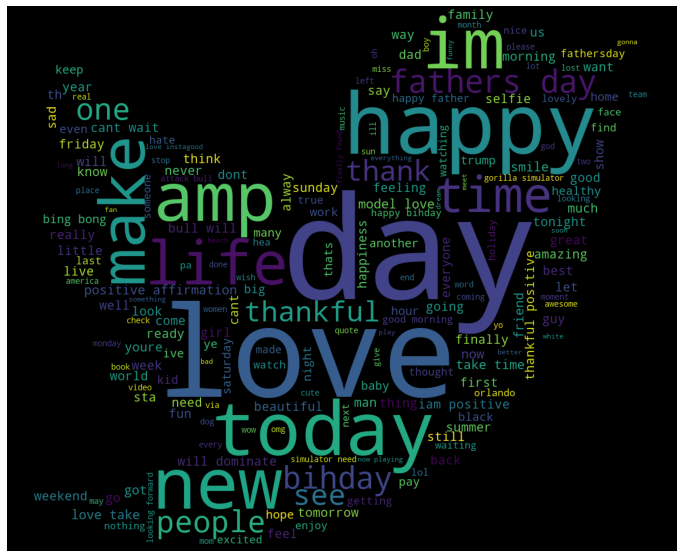

In [92]:
#Library to form wordcloud :
from wordcloud import WordCloud, ImageColorGenerator
import requests
import numpy as np
from PIL import *

#Library to plot the wordcloud :
import matplotlib.pyplot as plt

# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)


#Generating the wordcloud :
wordcloud = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(token_text)

#Plot the wordcloud :
plt.figure(figsize = (12, 12)) 
plt.imshow(wordcloud)

#To remove the axis value :
plt.axis("off") 
plt.show()

In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

X = df['clean_data']
tfidf = TfidfVectorizer(max_features= 10000, ngram_range=(1,2))
X = tfidf.fit_transform(X)

y = df['label']

X.shape

(31962, 10000)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.shape, X_test.shape

((25569, 10000), (6393, 10000))

In [95]:
clf = LinearSVC()
clf.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [96]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5985
           1       0.82      0.58      0.68       408

    accuracy                           0.97      6393
   macro avg       0.90      0.78      0.83      6393
weighted avg       0.96      0.97      0.96      6393



In [97]:
# if the result is 0 means that the tweet is positive
# if 1 means the tweet is negative/recist
x = 'He is black'

vec = tfidf.transform([x])
clf.predict(vec)

array([1])

In [98]:
#POS tag
#I can't print all the pos tag in this file, print the 3 words above instead.
from nltk import pos_tag

tag = pos_tag(words_token) # Since we do have a huge data, I got "IOPub data rate exceeded". Therefore, I did pos_tag for simple words in order to ensure that this func is works with no issues.
#tag = pos_tag((["day","love","happy"]))
print(tag)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

